In [2]:
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io
import math
import copy
import pandas as pd
import os

import sys
sys.path.append("..")
from Utility.segmentation_utils import *

In [3]:
IS = ImageSegmenter("../Images/Additional/Si embed/2_01.tif",override_exists=False)

Image Segmenter on 2_01 created!


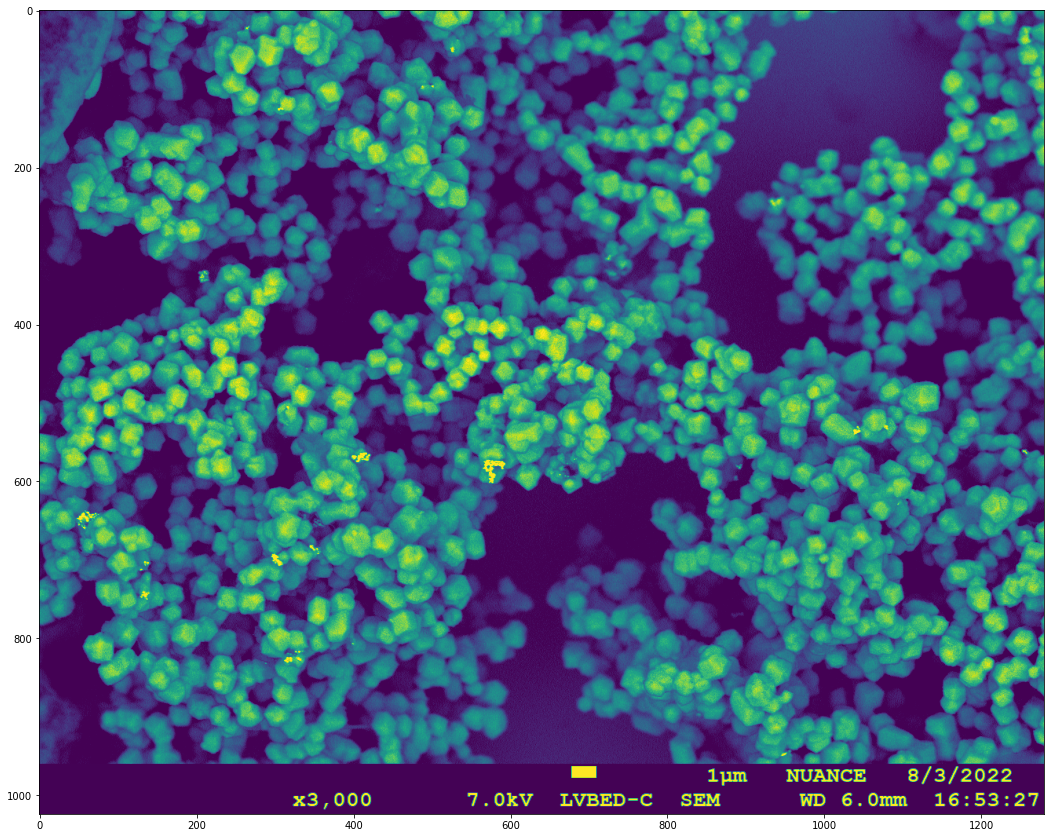

In [4]:
fig, ax = plt.subplots(figsize=(18,20))
ax.imshow(IS.img)

AttributeError: 'ImageSegmenter' object has no attribute '_bg_mark'

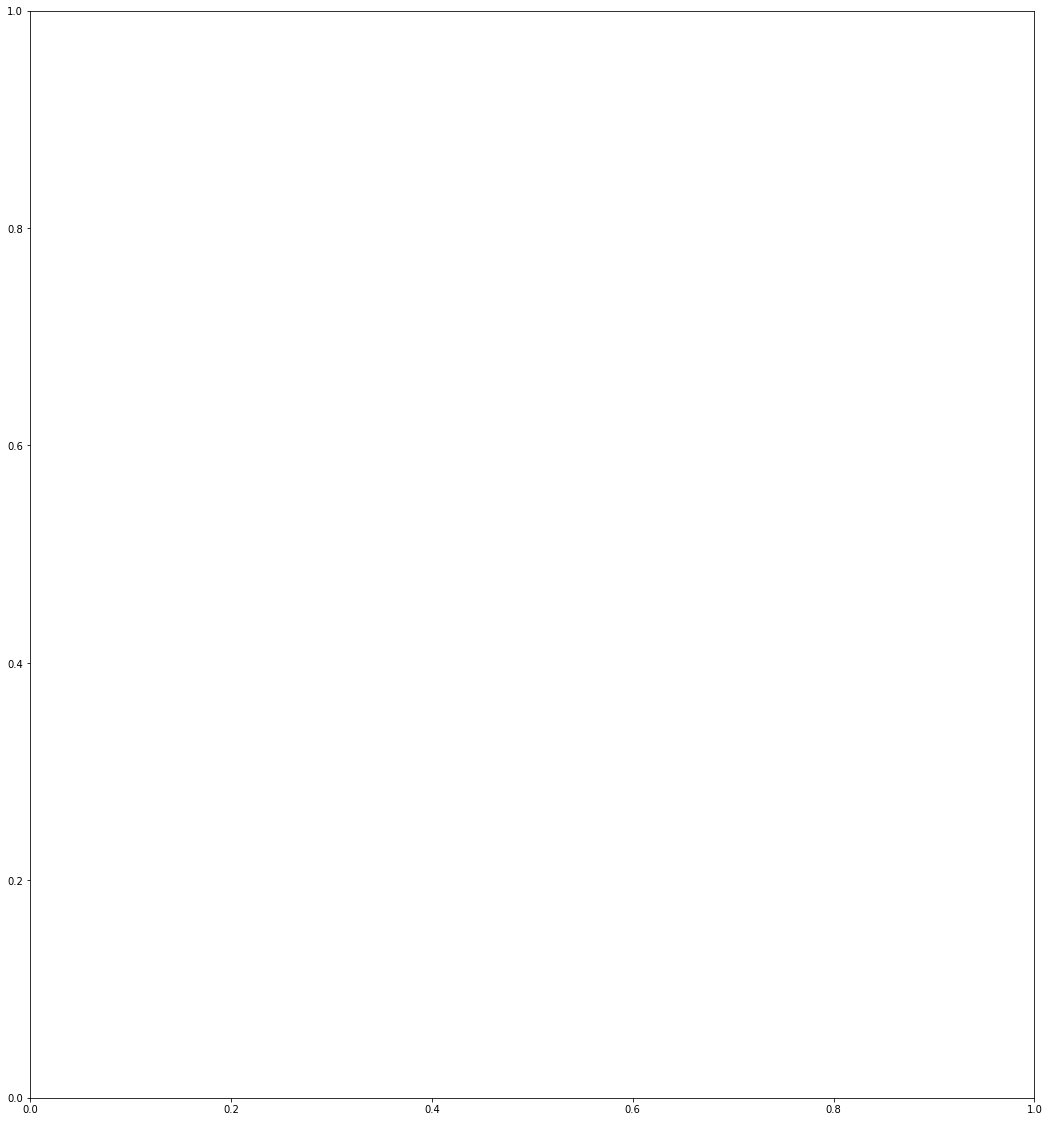

In [5]:
fig, ax = plt.subplots(figsize=(18,20))
ax.imshow(IS._bg_mark)

AttributeError: 'ImageSegmenter' object has no attribute '_dist_transform'

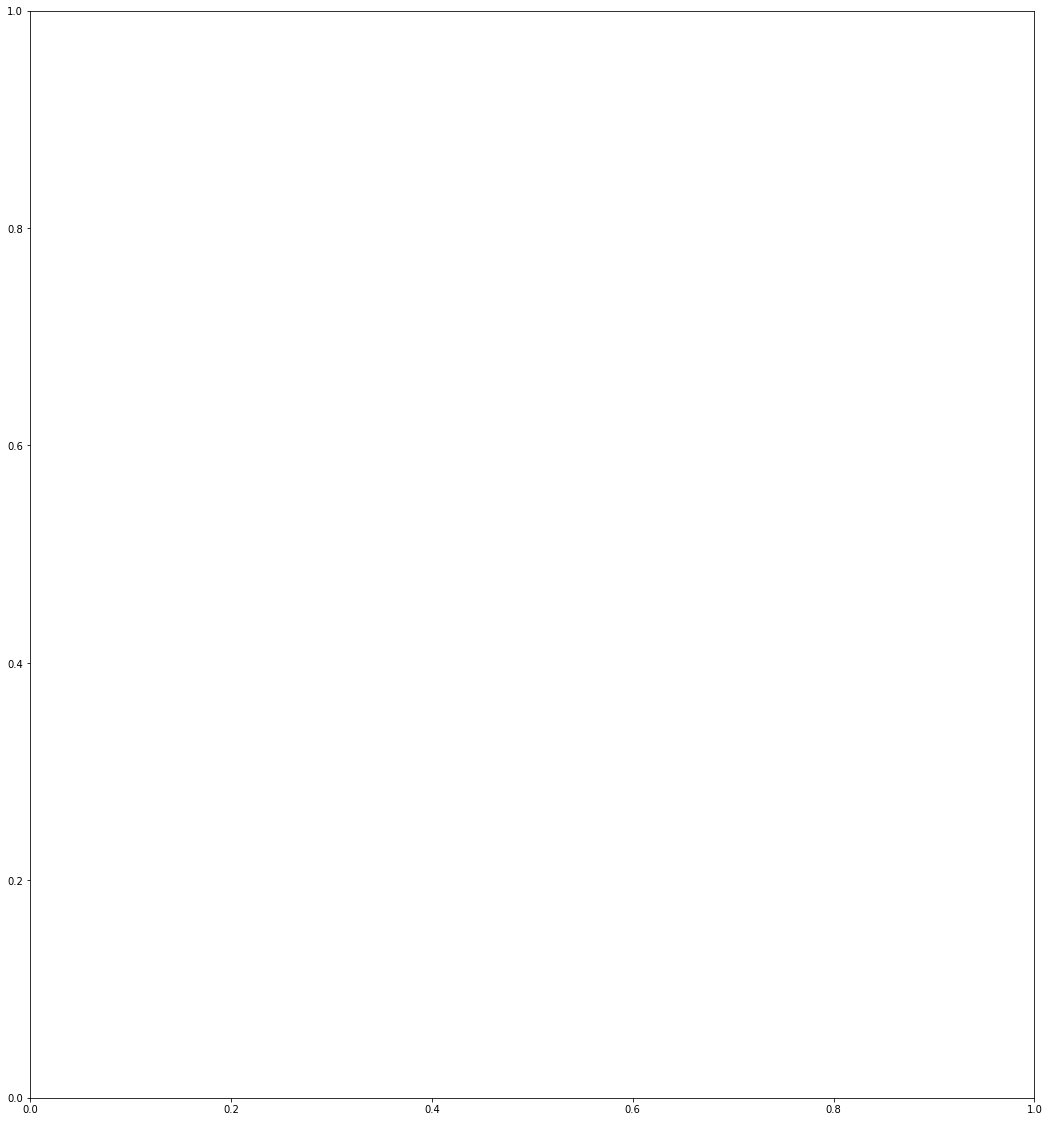

In [6]:
fig, ax = plt.subplots(figsize=(18,20))
ax.imshow(IS._dist_transform)

In [ ]:
fig, ax = plt.subplots(figsize=(18,20))
ax.imshow(IS.img3)

In [ ]:
fig, ax = plt.subplots(figsize=(18,20))
ax.imshow(IS.sobel_edge())

Image Segmenter on tmp created!


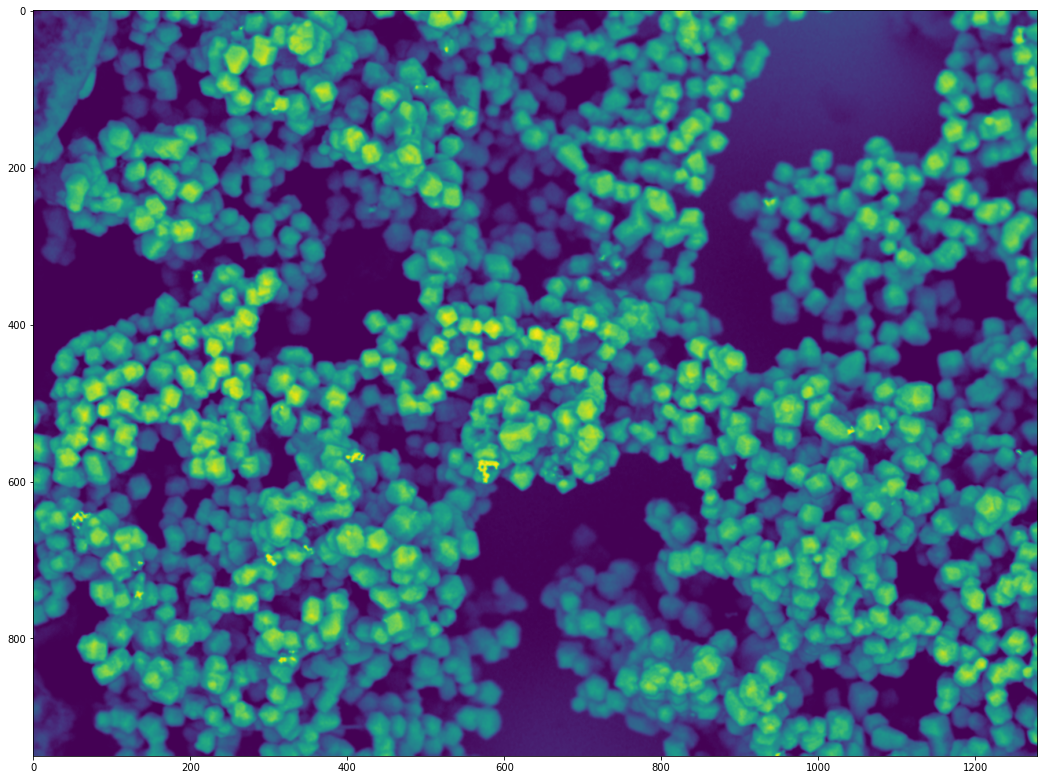

In [8]:
tl = 40
tu = tl*3
blur = cv2.GaussianBlur(IS.img2,(5,5),0)
#blur = cv2.bilateralFilter(IS.img2,9,100,100)
edge = cv2.Canny(blur,tl,tu)
fig, ax = plt.subplots(figsize=(18,20))
plt.imshow(blur)

IS_2 = ImageSegmenter(255-edge)

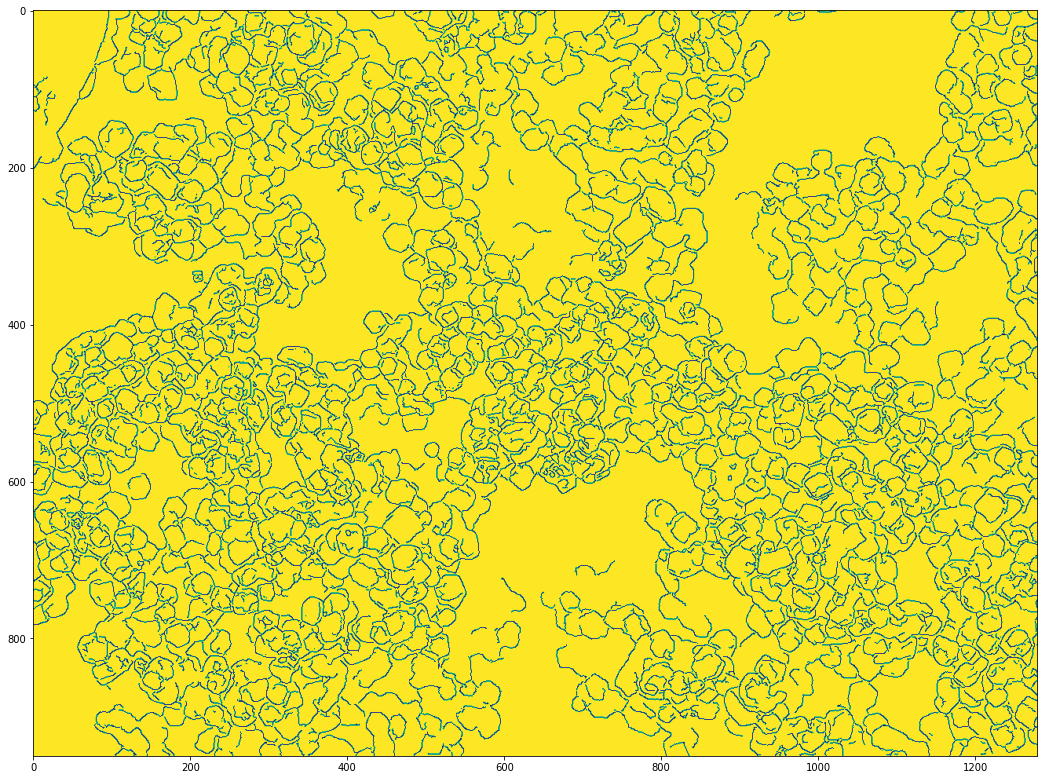

In [9]:
fig, ax = plt.subplots(figsize=(18,20))
ax.imshow(IS_2.img)

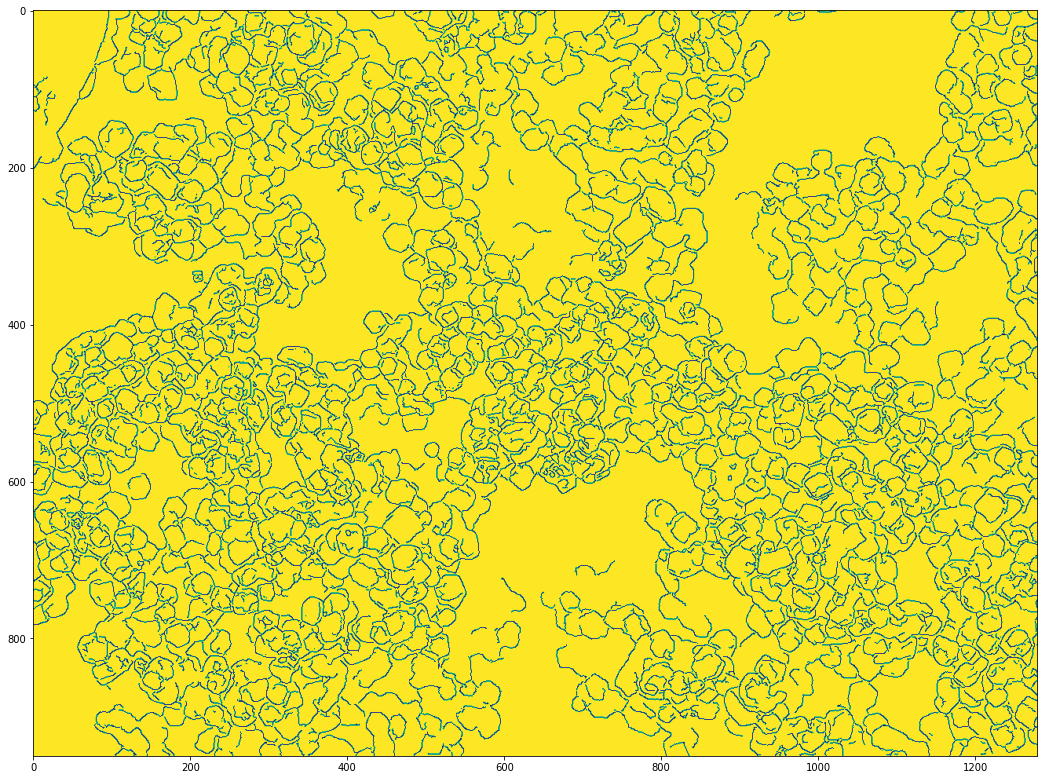

In [10]:
fig, ax = plt.subplots(figsize=(18,20))
ax.imshow(IS_2.img2)
test_img = copy.deepcopy(IS_2.img2)

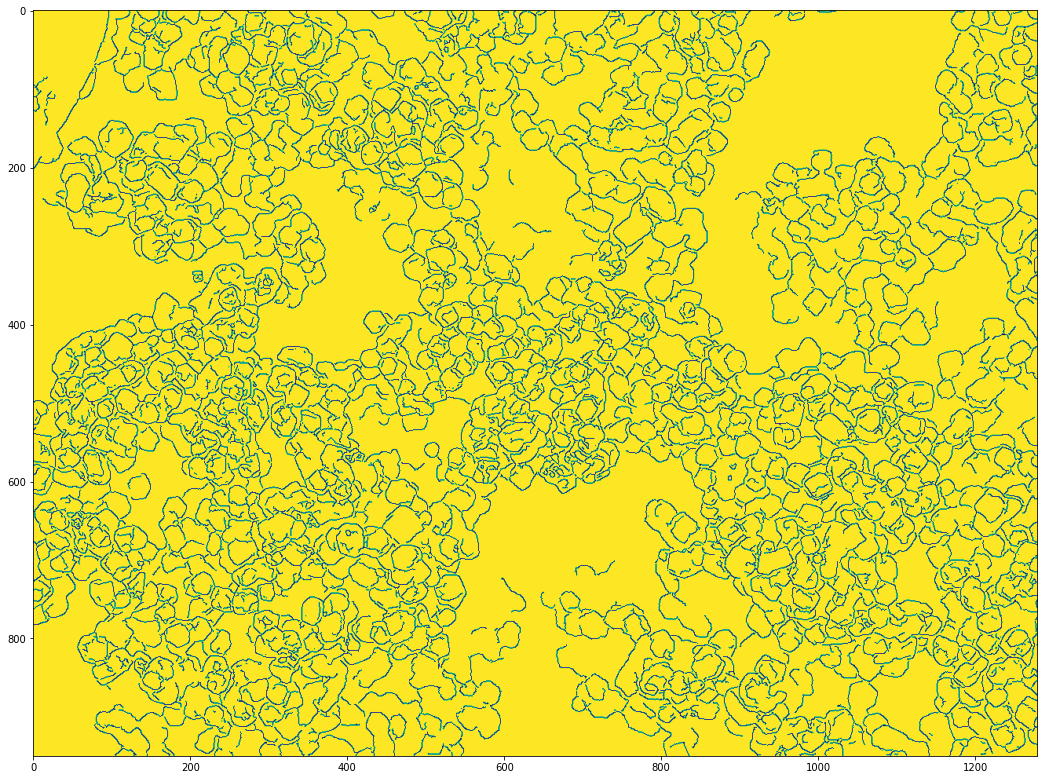

In [11]:
ret, th = cv2.threshold(test_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fig, ax = plt.subplots(figsize=(18,20))
ax.imshow(th)

In [12]:
th_wobg = th-(255-IS._bg_mark)

fig, ax = plt.subplots(figsize=(18,20))
ax.imshow(th_wobg)

AttributeError: 'ImageSegmenter' object has no attribute '_bg_mark'

In [ ]:
fig, ax = plt.subplots(figsize=(18,20))
ax.imshow(IS.markers)

In [7]:
kernel = np.ones((3,3),np.uint8)

#bg_mark = cv2.dilate(th_wobg,kernel,iterations = 1)
#bg_mark = cv2.erode(th_wobg,kernel,iterations = 1)
bg_mark = copy.deepcopy(th_wobg)
bg_mark[IS._bg_mark == 0] = 0
#apply distance transform
dist_transform = cv2.distanceTransform(bg_mark, cv2.DIST_L2, 5)

#thresholding the distance transformed image
ret2, fg_mark = cv2.threshold(dist_transform, .25*dist_transform.max(), 255, 0)
fg_mark = np.uint8(fg_mark)

#the unknown pixels
unknown = cv2.subtract(bg_mark, fg_mark)
unknown = unknown+(edge)

outputs = cv2.connectedComponentsWithStats(fg_mark)
label_increment = 1

markers = outputs[1]+label_increment

markers[unknown == 255]=0
markers2 = cv2.watershed(IS.img3,markers)

fig, ax = plt.subplots(figsize=(18,20))
ax.imshow(unknown)

NameError: name 'th_wobg' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(18,20))
ax.imshow(markers)

In [ ]:
logical = copy.deepcopy(markers2)
print(np.unique(logical))
logical[logical < 2] = 0
logical[logical > 1] = 2
test = copy.deepcopy(IS.img2)
test[logical != 2] = test[logical != 2]*.5 
fig, ax = plt.subplots(figsize=(18,20))
ax.imshow(test)

In [ ]:
logical = copy.deepcopy(IS.markers2)
print(np.unique(logical))
logical[logical < 2] = 0
logical[logical > 1] = 2
test = copy.deepcopy(IS.img2)
test[logical != 2] = test[logical != 2]*.5 
fig, ax = plt.subplots(figsize=(18,20))
ax.imshow(test)

In [ ]:
print(f'Original Scheme Region number: {max(np.unique(IS.markers2))}')
print(f'New Scheme Region number: {max(np.unique(markers2))}')